# Assignment 2 - Project 13 - Customer Clustering
## Simone Tarenzi, Saad Raza Hussain Shafi

## Importing the data

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

customers = pd.read_csv('Customers.csv')

In [117]:
customers

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [118]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


# Data Description

https://www.kaggle.com/datasets/datascientistanna/customers-dataset

This dataset is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

The dataset has 2000 records and 8 features:

* Customer ID: goes from 1 to 2000
* Gender: male or female
* Age: expressed in years
* Annual Income: expressed in dollars
* Spending Score: score assigned by the shop, based on customer behavior and spending nature
* Profession
* Work Experience: expressed in years
* Family Size: number of people in the household family unit

## Gender

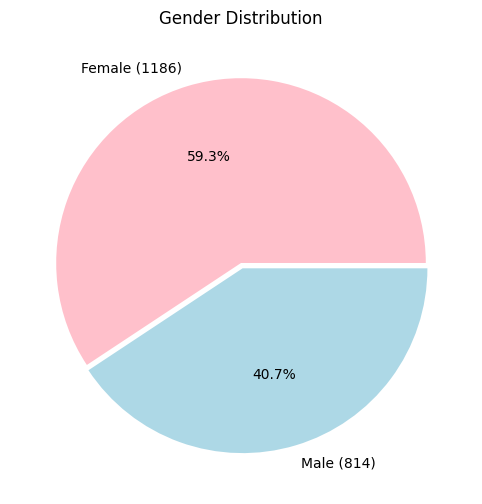

In [119]:
# pie chart of gender distribution
gender_counts = customers['Gender'].value_counts()

labels = [f'{label} ({count})' for label, count in gender_counts.items()]
explode = (0, 0.03)

plt.figure(figsize=(10,6))
plt.pie(gender_counts, explode=explode, labels=labels, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.show()

## Age

Min Age: 0 years
Max Age: 99 years
Standard Deviation: 28.43


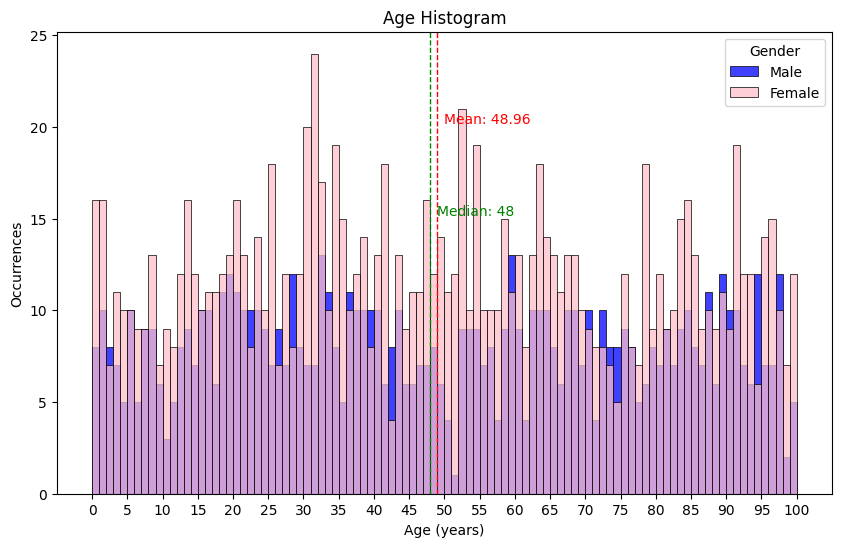

In [120]:
# get minimum and maximum age
min_age = customers['Age'].min()
max_age = customers['Age'].max()

print('Min Age: {:.0f} years'.format(min_age))
print('Max Age: {:.0f} years'.format(max_age))

# calculate average age
average_age = customers['Age'].mean()
median_age = customers['Age'].median()

# calculate standard deviation
std_age = customers['Age'].std()
print('Standard Deviation: {:.2f}'.format(std_age))

# separate age by gender
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

# create histograms
plt.figure(figsize=(10,6))
sns.histplot(male_customers['Age'], bins=range(0, max_age + 2), color='blue', label='Male')
sns.histplot(female_customers['Age'], bins=range(0, max_age + 2), color='pink', label='Female')
plt.xticks(np.arange(min_age, max_age + 2, 5))

# add average and median lines
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1)

# add text near the lines
plt.text(average_age + 1, plt.ylim()[1]-5, 'Mean: {:.2f}'.format(average_age), color='red')
plt.text(median_age + 1, plt.ylim()[1]-10, 'Median: {:.0f}'.format(median_age), color='green')

plt.title('Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Occurrences')
plt.legend(title='Gender')
plt.show()

## Annual Income